In [1]:
import numpy as np
import matplotlib.pyplot as plt

# DIA-NN simulation

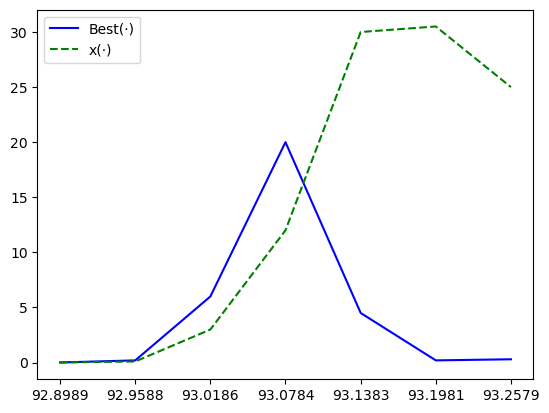

In [2]:
_, ax = plt.subplots()
x = [92.8989, 92.9588, 93.0186, 93.0784, 93.1383, 93.1981, 93.2579]
best = [0.01, 0.2, 6, 20, 4.5, 0.2, 0.3]
noised = [0.01, 0.1, 3, 12, 30, 30.5, 25]

ax.grid(False)
ax.plot(x, best, 'b', label='Best(·)')
ax.plot(x, noised, 'g--', label='x(·)')
ax.legend()
plt.xticks(x)
plt.savefig('0-example.png', transparent=True)
plt.show()

## 1. Best peak is smoothed then ref(·) is generated.

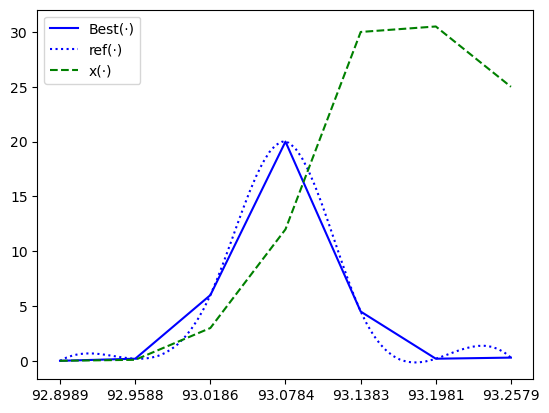

In [3]:
from scipy.interpolate import interp1d

ref_x = np.linspace(x[0], x[-1], len(x) * 10)
func_spline = interp1d(x, best, kind='cubic')
ref = func_spline(ref_x)

_, ax = plt.subplots()
ax.plot(x, best, 'b-', label='Best(·)')
ax.plot(ref_x, ref, 'b:', label='ref(·)')
ax.plot(x, noised, 'g--', label='x(·)')
ax.grid(False)
ax.legend()
plt.xticks(x)
plt.savefig('1-smoothed_peak.png', transparent=True)
plt.show()

# 2. Calculate weighted pea


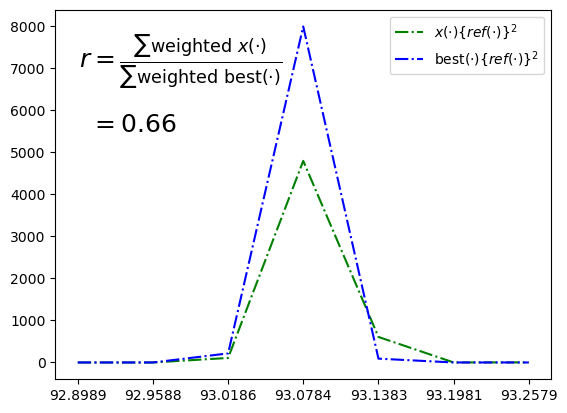

In [4]:
noised_weighted = [noised[i] * func_spline(x) ** 2 for i, x in enumerate(x)]
noised_weighted_intensity = sum(noised_weighted)
best_weighted = [best[i] * func_spline(x) ** 2 for i, x in enumerate(x)]
best_weighted_intensity = sum(best_weighted)
_, ax = plt.subplots()
ax.plot(x, noised_weighted, 'g-.', label=r'$x(\cdot) \{ref(\cdot)\}^2$')
ax.plot(x, best_weighted, 'b-.', label=r'$\mathrm{best}(\cdot) \{ref(\cdot)\}^2$')

r = round(noised_weighted_intensity / best_weighted_intensity, 2)
ax.text(92.9, 7000, r"$r = \frac{\sum{\mathrm{weighted}\ x(\cdot)}}{\sum{\mathrm{weighted}\ \mathrm{best}(\cdot)}}$", fontsize=18)
ax.text(92.9, 5500, f"$\\>\\>= {r}$", fontsize=18)
ax.legend()
ax.grid(False)
plt.xticks(x)
plt.savefig('2-weighted_peak.png', transparent=True)
plt.show()

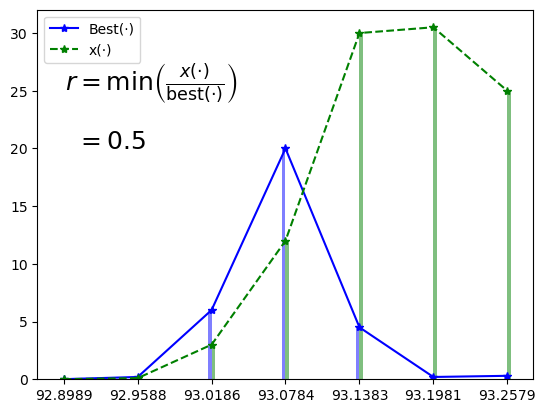

In [5]:
_, ax = plt.subplots()
ax.plot(x, best, 'b-*', label='Best(·)')
ax.plot(x, noised, 'g--*', label='x(·)')
ax.grid(False)
ax.legend()
ax.bar(x, best, width=-0.003, align='edge', color='b', alpha=0.5)
ax.bar(x, noised, width=0.003,align='edge',  color='g', alpha=0.5)
r = (np.array(noised) / np.array(best)).min()
ax.text(92.9, 25, r"$r = \min\left(\frac{x(\cdot)}{\mathrm{best}(\cdot)}\right)$", fontsize=18)
ax.text(92.9, 20, f"$\\>\\> = {r}$", fontsize=18)
plt.xticks(x)
plt.savefig('2-ratio-min.png', transparent=True)
plt.show()

In [6]:
corr = abs(np.corrcoef(best, noised)[0, 1])
if corr < 0.8:
    r = (np.array(noised) / np.array(best)).min()
else:
    r = noised_weighted_intensity / best_weighted_intensity
print(f"Correlation: {corr:.3f}, ratio r: {r:.3f}")

Correlation: 0.069, ratio r: 0.500


## 3. Remove noised peak

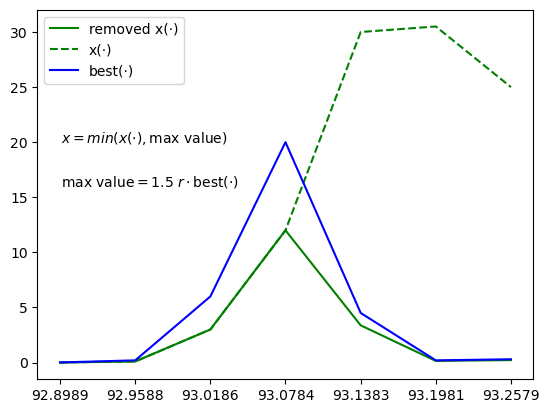

In [7]:
max_value = 1.5 * r * np.array(best)
removed_noised = [min(noised[i], max_value[i]) for i in range(len(x))]
_, ax = plt.subplots()
ax.plot(x, removed_noised, 'g-', label='removed x(·)')
ax.plot(x, noised, 'g--', label='x(·)')
ax.plot(x, best, 'b-', label='best(·)')
ax.text(92.9, 20, r"$x = min(x(\cdot), \mathrm{max\ value})$")
ax.text(92.9, 16, r"$\mathrm{max\ value} = 1.5\ r \cdot \mathrm{best}(\cdot)$")
ax.grid(False)
ax.legend()
plt.xticks(x)
plt.savefig('3-removed_noised.png', transparent=True)
plt.show()